In [3]:
!conda install -y scipy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [4]:
import matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
tsv_dir = '/home/martinmcgg/'

In [6]:
def load(csv_fname):
    return pd.read_csv(csv_fname, sep='\t', header=None).dropna().sort_values(by=[0]).rename(columns={0: 'kimgs', 1: 'FID', 2: 'pkl_file'})
#load(tsv_dir+'Baseline.tsv')

In [7]:
data_baseline = load(tsv_dir+'Baseline.tsv')
data_baseline

,kimgs,FID,pkl_file
0,0,175.779096,/mnt/proj2/open-26-1/out/skygan256/00115-style...
62,120,158.188717,/mnt/proj2/open-26-1/out/skygan256/00115-style...
63,240,152.813162,/mnt/proj2/open-26-1/out/skygan256/00115-style...
64,360,143.021264,/mnt/proj2/open-26-1/out/skygan256/00115-style...
65,480,115.755189,/mnt/proj2/open-26-1/out/skygan256/00115-style...
...,...,...,...
8,30007,27.965095,/mnt/proj2/open-26-1/out/skygan256/00134-style...
35,30247,30.169134,/mnt/proj2/open-26-1/out/skygan256/00134-style...
20,30487,33.462827,/mnt/proj2/open-26-1/out/skygan256/00134-style...
36,30728,28.654975,/mnt/proj2/open-26-1/out/skygan256/00134-style...


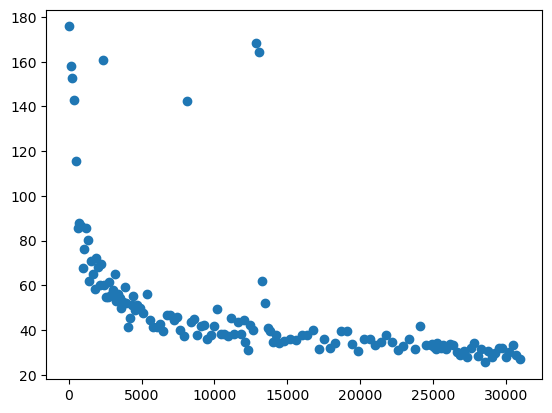

In [8]:
plt.scatter(data_baseline['kimgs'], data_baseline['FID'])

In [9]:
data_baseline.sort_values(by=['kimgs']).reset_index(drop=True)['kimgs'].diff(periods=1)

0        NaN
1      120.0
2      120.0
3      120.0
4      120.0
       ...  
137    241.0
138    240.0
139    240.0
140    241.0
141    240.0
Name: kimgs, Length: 142, dtype: float64

In [10]:
tmp_data = data_baseline.sort_values(by=['kimgs'])#.reset_index(drop=True)
tmp_data

,kimgs,FID,pkl_file
0,0,175.779096,/mnt/proj2/open-26-1/out/skygan256/00115-style...
62,120,158.188717,/mnt/proj2/open-26-1/out/skygan256/00115-style...
63,240,152.813162,/mnt/proj2/open-26-1/out/skygan256/00115-style...
64,360,143.021264,/mnt/proj2/open-26-1/out/skygan256/00115-style...
65,480,115.755189,/mnt/proj2/open-26-1/out/skygan256/00115-style...
...,...,...,...
8,30007,27.965095,/mnt/proj2/open-26-1/out/skygan256/00134-style...
35,30247,30.169134,/mnt/proj2/open-26-1/out/skygan256/00134-style...
20,30487,33.462827,/mnt/proj2/open-26-1/out/skygan256/00134-style...
36,30728,28.654975,/mnt/proj2/open-26-1/out/skygan256/00134-style...


In [76]:
def subsample(tmp_data, target_step=200, keep_kimg=None):
    diffs = tmp_data['kimgs'].diff(periods=1)
    #print(diffs.min(), diffs.max())
    acc = 0
    selected_indices = [] if keep_kimg is None else [tmp_data.reset_index()[tmp_data.reset_index()['kimgs'] == keep_kimg].index.values[0]]
    print('keeping i', selected_indices)
    print('keeping', tmp_data.iloc[selected_indices])
    for i, diff in enumerate(diffs):
        if i == 0 and np.isnan(diff):
            continue
        assert not np.isnan(diff)
        #print('i, diff', i, diff)
        acc += diff
        #print('acc', acc)
        if acc > target_step:
            acc -= target_step # or 0?
            #print(selected_indices)
            selected_indices.append(i)
        #if i > 2: break
    #print('selected_indices', selected_indices)
    return tmp_data.iloc[selected_indices].sort_values(by=['kimgs'])

tmp_data_subsampled = subsample(tmp_data, target_step=1000, keep_kimg=360)
tmp_data_subsampled

keeping i [3]
keeping     kimgs         FID                                           pkl_file
64    360  143.021264  /mnt/proj2/open-26-1/out/skygan256/00115-style...


,kimgs,FID,pkl_file
64,360,143.021264,/mnt/proj2/open-26-1/out/skygan256/00115-style...
106,1061,76.013410,/mnt/proj2/open-26-1/out/skygan256/00115-style...
109,2103,60.202748,/mnt/proj2/open-26-1/out/skygan256/00115-style...
73,3024,58.030823,/mnt/proj2/open-26-1/out/skygan256/00115-style...
75,4066,41.365815,/mnt/proj2/open-26-1/out/skygan256/00115-style...
22,5108,47.743412,/mnt/proj2/open-26-1/out/skygan256/00115-style...
118,6029,41.459207,/mnt/proj2/open-26-1/out/skygan256/00115-style...
83,7191,44.465216,/mnt/proj2/open-26-1/out/skygan256/00115-style...
40,8133,142.485846,/mnt/proj2/open-26-1/out/skygan256/00115-style...
123,9054,41.847140,/mnt/proj2/open-26-1/out/skygan256/00115-style...


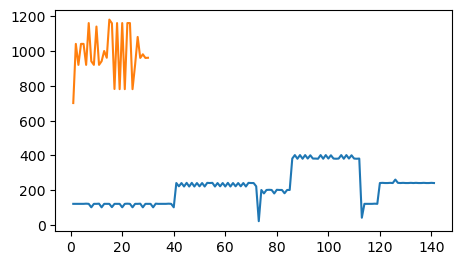

In [77]:
plt.plot(tmp_data['kimgs'].diff(periods=1).reset_index(drop=True))
plt.plot(tmp_data_subsampled['kimgs'].diff(periods=1).reset_index(drop=True))

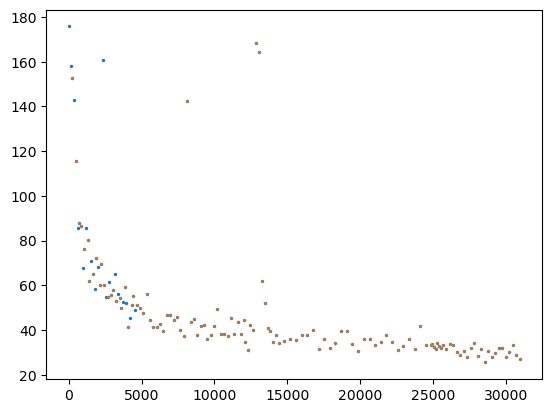

In [14]:
plt.scatter(tmp_data['kimgs'], tmp_data['FID'], s=2)
plt.scatter(tmp_data_subsampled['kimgs'], tmp_data_subsampled['FID'], s=2, alpha=0.5)

In [15]:
tmp_data

,kimgs,FID,pkl_file
0,0,175.779096,/mnt/proj2/open-26-1/out/skygan256/00115-style...
62,120,158.188717,/mnt/proj2/open-26-1/out/skygan256/00115-style...
63,240,152.813162,/mnt/proj2/open-26-1/out/skygan256/00115-style...
64,360,143.021264,/mnt/proj2/open-26-1/out/skygan256/00115-style...
65,480,115.755189,/mnt/proj2/open-26-1/out/skygan256/00115-style...
...,...,...,...
8,30007,27.965095,/mnt/proj2/open-26-1/out/skygan256/00134-style...
35,30247,30.169134,/mnt/proj2/open-26-1/out/skygan256/00134-style...
20,30487,33.462827,/mnt/proj2/open-26-1/out/skygan256/00134-style...
36,30728,28.654975,/mnt/proj2/open-26-1/out/skygan256/00134-style...


In [16]:
data_aug = load(tsv_dir+'Aug.tsv')
data_aug

,kimgs,FID,pkl_file
0,0,169.020384,/mnt/proj2/open-26-1/out/skygan256/00122-style...
30,120,179.258951,/mnt/proj2/open-26-1/out/skygan256/00122-style...
17,240,141.860099,/mnt/proj2/open-26-1/out/skygan256/00122-style...
31,360,154.321165,/mnt/proj2/open-26-1/out/skygan256/00122-style...
139,440,106.898220,/mnt/proj2/open-26-1/out/skygan256/00122-style...
...,...,...,...
16,30045,23.013906,/mnt/proj2/open-26-1/out/skygan256/00136-style...
61,30166,26.411708,/mnt/proj2/open-26-1/out/skygan256/00136-style...
29,30286,25.228658,/mnt/proj2/open-26-1/out/skygan256/00136-style...
62,30406,22.820465,/mnt/proj2/open-26-1/out/skygan256/00136-style...


In [17]:
data_clear = load(tsv_dir+'Clear.tsv')
data_clear

,kimgs,FID,pkl_file
0,0,177.377095,/mnt/proj2/open-26-1/out/skygan256/00123-style...
30,120,127.743319,/mnt/proj2/open-26-1/out/skygan256/00123-style...
79,220,167.422124,/mnt/proj2/open-26-1/out/skygan256/00123-style...
80,340,149.895328,/mnt/proj2/open-26-1/out/skygan256/00123-style...
127,440,110.546418,/mnt/proj2/open-26-1/out/skygan256/00123-style...
...,...,...,...
6,29505,24.319007,/mnt/proj2/open-26-1/out/skygan256/00135-style...
28,29746,22.704414,/mnt/proj2/open-26-1/out/skygan256/00135-style...
13,29986,21.774891,/mnt/proj2/open-26-1/out/skygan256/00135-style...
29,30226,25.134753,/mnt/proj2/open-26-1/out/skygan256/00135-style...


In [18]:
data_ours = load(tsv_dir+'Ours.tsv')
data_ours

,kimgs,FID,pkl_file
0,0,172.453133,/mnt/proj2/open-26-1/out/skygan256/00103-style...
50,180,133.620984,/mnt/proj2/open-26-1/out/skygan256/00103-style...
79,340,137.669360,/mnt/proj2/open-26-1/out/skygan256/00103-style...
114,500,127.379541,/mnt/proj2/open-26-1/out/skygan256/00103-style...
51,661,65.658055,/mnt/proj2/open-26-1/out/skygan256/00103-style...
...,...,...,...
12,30085,18.016609,/mnt/proj2/open-26-1/out/skygan256/00133-style...
48,30205,15.207632,/mnt/proj2/open-26-1/out/skygan256/00133-style...
23,30326,17.037252,/mnt/proj2/open-26-1/out/skygan256/00133-style...
49,30446,18.050810,/mnt/proj2/open-26-1/out/skygan256/00133-style...


In [19]:
#matplotlib.rcParams['mathtext.fontset'] = 'custom'
#matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
#matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
#matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [20]:
#matplotlib.rcParams['font.family'] = 'serif'

In [21]:
plt.rcParamsDefault["figure.figsize"]

[6.4, 4.8]

In [22]:
matplotlib.rcParams['pdf.fonttype']

3

In [23]:
max_kimgs = 30000

In [24]:
def find_best(data, limit_kimgs=max_kimgs):
    #d = data[data['kimgs'] <= limit_kimgs]
    d = data
    fid = d['FID'].min()
    best_idx = d['FID'].argmin()
    at_kimgs = d['kimgs'].iloc[best_idx]
    pkl_file = d['pkl_file'].iloc[best_idx]
    return fid, at_kimgs, pkl_file

In [25]:
figsize_scale = 0.8
plt.rcParams["figure.figsize"] = (figsize_scale*6.4, figsize_scale*4.8*.75)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams['grid.color'] = (0.3, 0.3, 0.3, 0.2)

25.460292102368328 28564
keeping i [131]
keeping     kimgs        FID                                           pkl_file
18  28564  25.460292  /mnt/proj2/open-26-1/out/skygan256/00134-style...
Baseline best FID: 25.460292102368328 at 28564 kimgs - /mnt/proj2/open-26-1/out/skygan256/00134-stylegan3-t-auto_processed_20230405_1727-gpus8-batch32-gamma2/network-snapshot-003665.pkl

20.755226875176906 29204
keeping i [170]
keeping     kimgs        FID                                           pkl_file
57  29204  20.755227  /mnt/proj2/open-26-1/out/skygan256/00136-style...
+Aug best FID: 20.755226875176906 at 29204 kimgs - /mnt/proj2/open-26-1/out/skygan256/00136-stylegan3-t-auto_processed_20230405_1727-gpus8-batch32-gamma2/network-snapshot-002203.pkl

21.480650095808556 26541
keeping i [149]
keeping     kimgs       FID                                           pkl_file
43  26541  21.48065  /mnt/proj2/open-26-1/out/skygan256/00135-style...
+Clear best FID: 21.480650095808556 at 26541 kimgs - 

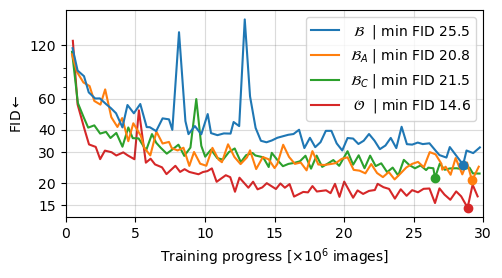

In [81]:
plot_fid, plot_best_fid, plot_density = True, True, False
#plot_fid, plot_best_fid, plot_density = False, False, True

def plot_one(data, label, label_text, yoffset=0, z=None):
    d = data[data['kimgs'] <= max_kimgs]
    best_fid, best_at_kimgs, pkl_path = find_best(d)
    #plt.plot(d['kimgs']/1000, d['FID'], label=label + f' | min {best_fid:.1f} @ {best_at_kimgs//10/100}M') #label=r'$\mathcal{B}$aseline'
    if plot_density:
        from scipy.stats import kde
        density = kde.gaussian_kde(d['kimgs']/1000, bw_method=0.02)
        x = np.linspace(0, max_kimgs/1000, 300)
        y = density(x)
        plt.plot(x, y, label=f'{label} ({label_text})', zorder=z)
    
    if plot_fid:
        plt.plot(d['kimgs']/1000, d['FID'], label=label + f' | min FID {best_fid:.1f}', zorder=z) #label=r'$\mathcal{B}$aseline'

    print(f'{label_text} best FID: {best_fid} at {best_at_kimgs} kimgs - {pkl_path}\n')
    
    if plot_best_fid:
        plt.scatter(best_at_kimgs/1000, best_fid, zorder=z+10)
    #plt.annotate(f'{best_fid:.2f} at {best_at_kimgs//10/100}M', (best_at_kimgs, best_fid), (best_at_kimgs+200, best_fid+yoffset))

def s(d):
    best_fid, best_at_kimgs, pkl_path = find_best(d)
    print(best_fid, best_at_kimgs)
    return subsample(d, target_step=400, keep_kimg=best_at_kimgs)

plot_one(s(data_baseline), r'$\mathcal{B}$ ', 'Baseline', z=4)
plot_one(s(data_aug), r'$\mathcal{B}_A$', '+Aug', z=3)#, yoffset=-2)
plot_one(s(data_clear), r'$\mathcal{B}_C$', '+Clear', z=2)
plot_one(s(data_ours), r'$\mathcal{O}$ ', 'Ours', z=1)

plt.xlim((0,max_kimgs/1000))
#plt.ylim((15,None))
if plot_fid or plot_best_fid:
    plt.yscale('log')
    plt.yticks([15,20,30,40,60,120])
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
    #.set_major_formatter(ScalarFormatter())
    plt.xlabel(r'Training progress [$\times 10^6$ images]')
    plt.ylabel(r'FID$\leftarrow$')
legend = plt.legend()
leg_transform = legend.get_transform()

max_shift = max([t.get_window_extent().width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right')  # ha is alias for horizontalalignment
    temp_shift = max_shift - t.get_window_extent().width
    t.set_position((temp_shift, 0))

#plt.text(-10.0,10.18,'a',fontsize=12)
#plt.gca().text(1, 1, 'right top',
#        horizontalalignment='right',
#        verticalalignment='top',
#        transform=plt.gca().transAxes)
#plt.text(-10.0,10.18,r'$\mathcal{B}$',fontsize=12)
plt.grid()#color=(0.3, 0.3, 0.3, 0.2))

plt.tight_layout()
plt.savefig('FID_plot.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

In [27]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

In [ ]:
a=[1.2]
b=[3,4]

: 

In [ ]:
plt.plot(a,b,'g',linewidth=3.5, label = 'a')
plt.rc('text', usetex=True)
plt.legend(labelspacing = 1.0,loc=1,prop={'size':40})
plt.xlabel(r'{\fontsize{50pt}{3em}\selectfont{}a}{\fontsize{20pt}{3em}\selectfont{}N')

: 

In [ ]:
plt.plot([1,2], [3,4])

: 

: 